To recap, we follow the following steps for our models in PyTorch:
- Design Model (input, output size, forward pass)
- Construct loss and optimizer
- Training loop:
    - forward pass: compute the prediction and loss
    - backward pass: compute the gradients
    - update the weights

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

epoch: 10, loss = 4454.6499
epoch: 20, loss = 3322.6072
epoch: 30, loss = 2503.3635
epoch: 40, loss = 1909.8629
epoch: 50, loss = 1479.4819
epoch: 60, loss = 1167.1072
epoch: 70, loss = 940.1935
epoch: 80, loss = 775.2341
epoch: 90, loss = 655.2285
epoch: 100, loss = 567.8697


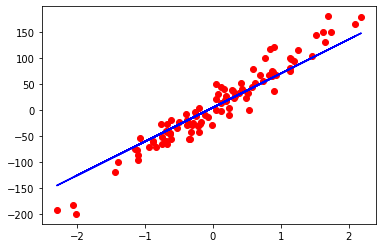

In [3]:
# prepare our data
X_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1, noise=20, random_state=1)
#  used to generate a random dataset that can be used for regression tasks
#  generates a dataset with a # of features and samples, and a target variable that is a linear func. of the input features with some added noise

# initially X_numpy has a double datatype which can lead to errors, so we convert it to float32
# torch.from_numpy() is used to convert from a numpy array to a torch tensor

# .astype() is a method in numpy and pandas that allow us to convert the datatype of the array or pandas dataframe

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# right now, 'y' has all its values as a single row and we want to make it a column vector
y = y.view((y.shape[0], 1)) # .view() reshapes the tensor - argument is a tuple for the new dimensions

n_samples, num_features = X.shape # samples = rows, features = columns

# design the model

# for linear regression here we are just having one layer, so we can use the built-in Linear module
input_size = num_features
output_size = 1 # we just want one value for every sample that we put in
model = nn.Linear(input_size, output_size)


# define the loss and optimizer
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


# training loop
num_epochs = 100

for epoch in range(num_epochs):
  # forward pass
  y_pred = model(X)
  curr_loss = criterion(y_pred, y)
  
  # backward pass
  curr_loss.backward() # doing backpropagation on and calculate the gradients w.r.t the current_loss
  
  # update
  optimizer.step()
  optimizer.zero_grad() # clear the gradients

  # let's also print some info every 10th step
  if (epoch + 1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {curr_loss.item():.4f}') # .item() to get the actual value - formatted to only ger 4 decimal values



# now let's plot this

# we are now calling the final model (post testing)
predicted = model(X).detach().numpy()
# we want to prevent this operation from being tracked in our computational graph, so we detach it
# currently, the tensor has the required_grad = True but we want to set it to false
# so detaching generates a new tensor where grad calculation attribute is false

# plotting X vs labels, and X vs predictions
plt.plot(X_numpy, y_numpy, 'ro') # 'ro' for red dots
plt.plot(X_numpy, predicted, 'b') # 'b' for blue line
plt.show()


